In [4]:
%matplotlib inline

import gym
import matplotlib
import numpy as np
import sys

from collections import defaultdict
if "../" not in sys.path:
  sys.path.append("../") 
from lib.envs.blackjack import BlackjackEnv
from lib import plotting

matplotlib.style.use('ggplot')

In [5]:
env = BlackjackEnv()

In [6]:
def make_epsilon_greedy_policy(Q, epsilon, nA):
    """
    Creates an epsilon-greedy policy based on a given Q-function and epsilon.
    
    Args:
        Q: A dictionary that maps from state -> action-values.
            Each value is a numpy array of length nA (see below)
        epsilon: The probability to select a random action . float between 0 and 1.
        nA: Number of actions in the environment.
    
    Returns:
        A function that takes the observation as an argument and returns
        the probabilities for each action in the form of a numpy array of length nA.
    
    """
    def policy_fn(observation):
        probgreedy = 1.0 - epsilon + (epsilon/nA)
        probrest = epsilon/nA
        actions = Q[observation]
        probabilities = [probrest]*nA
        max_index = np.argmax(actions)
        probabilities[max_index] = probgreedy
        choice = np.random.choice(nA,1,probabilities)[0]
        return choice

        # Implement this!
    return policy_fn

In [7]:
def mc_control_epsilon_greedy(env, num_episodes, discount_factor=1.0, epsilon=0.1):
    """
    Monte Carlo Control using Epsilon-Greedy policies.
    Finds an optimal epsilon-greedy policy.
    
    Args:
        env: OpenAI gym environment.
        num_episodes: Number of episodes to sample.
        discount_factor: Gamma discount factor.
        epsilon: Chance the sample a random action. Float betwen 0 and 1.
    
    Returns:
        A tuple (Q, policy).
        Q is a dictionary mapping state -> action values.
        policy is a function that takes an observation as an argument and returns
        action probabilities
    """
    
    # Keeps track of sum and count of returns for each state
    # to calculate an average. We could use an array to save all
    # returns (like in the book) but that's memory inefficient.
    returns_sum = defaultdict(float)
    returns_count = defaultdict(float)
    
    Q = defaultdict(lambda: np.zeros(env.action_space.n))
    
    policy = make_epsilon_greedy_policy(Q, epsilon, env.action_space.n)
    for i in range(num_episodes):
        
        G = 0
        states = []
        r = []
        s0 = env.reset()
        while True:
            an = policy(s0)
            sn,rn, done, _ = env.step(an)
            states.append((s0,an))
            r.append(rn)
            s0 = sn
            if (done):
                break
        for j in range(len(states)-1,-1,-1):
            s0,a = states[j]
            rn = r[j]
            G = discount_factor*G + rn
            if not((s0,a) in states[0:j]):
                returns_sum[(s0,a)] += G
                returns_count[(s0,a)] += 1
                Q[s0][a] = returns_sum[(s0,a)]/returns_count[(s0,a)] 

                  
            
    
    
    # Keeps track of sum and count of returns for each state
    # to calculate an average. We could use an array to save all
    # returns (like in the book) but that's memory inefficient.
    
    
    # The final value function
    
    # Implement this!

    # The final action-value function.
    # A nested dictionary that maps state -> (action -> action-value).
    
    # The policy we're following
    
    # Implement this!
    
    return Q, policy

In [8]:
Q, policy = mc_control_epsilon_greedy(env, num_episodes=500000, epsilon=0.1)

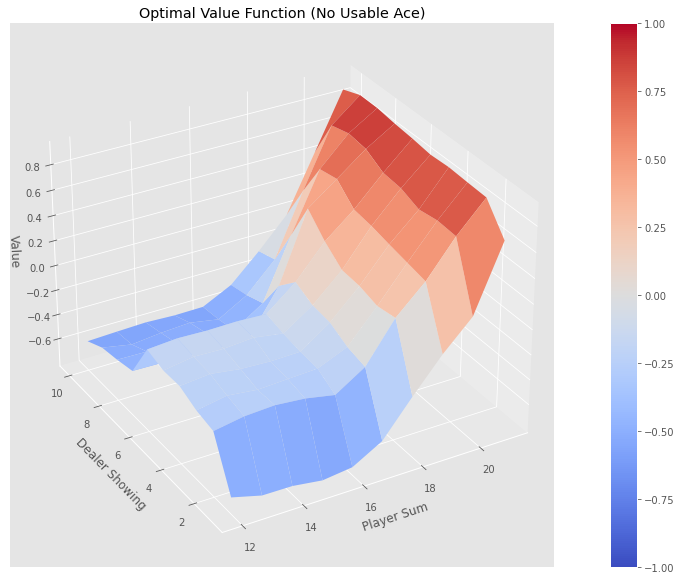

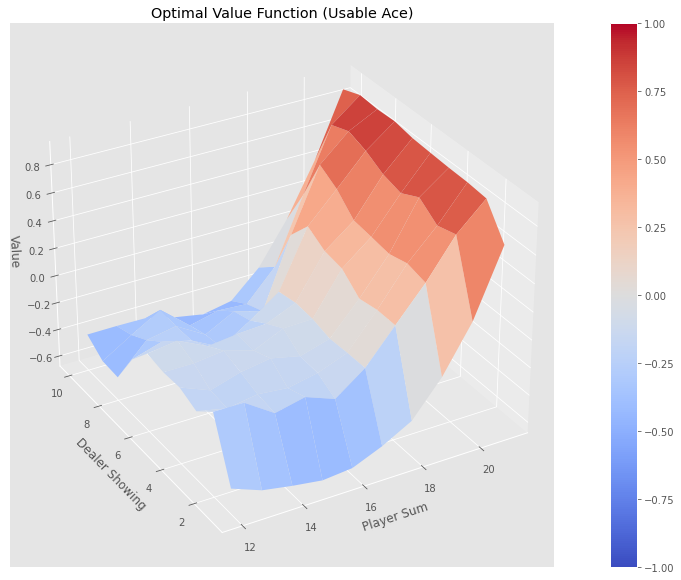

In [9]:
# For plotting: Create value function from action-value function
# by picking the best action at each state
V = defaultdict(float)
for state, actions in Q.items():
    action_value = np.max(actions)
    V[state] = action_value
plotting.plot_value_function(V, title="Optimal Value Function")

0